In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 218M/218M [00:03<00:00, 105MB/s] 
100% 218M/218M [00:03<00:00, 74.1MB/s]


In [5]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()


In [6]:
import tensorflow as tf
import os
import numpy as np

In [7]:
base_dir = '/content/training_set'

In [8]:
IMAGE_SIZE=224
BATCH_SIZE=128

# for training
train_datagen=tf.keras.preprocessing.image.ImageDataGenerator(


    rescale=1./255,   #normaliztion
    zoom_range=0.2,   #augmentation
    horizontal_flip=True,  #augmentation
    validation_split=0.1)


# for testing
validation_datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,   #normaliztion

    validation_split=0.1
)

In [9]:
train_genarator=train_datagen.flow_from_directory(
    base_dir,    # path
    target_size=(IMAGE_SIZE,IMAGE_SIZE),   #size 224*244
    batch_size=BATCH_SIZE,                 # batch size
    subset='training'                        # for trainign


)

validation_generator=validation_datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE,IMAGE_SIZE),     #size 224*244
    batch_size=BATCH_SIZE,                   # batch size
    subset='validation'                     # for testing


)

Found 7205 images belonging to 1 classes.
Found 800 images belonging to 1 classes.


In [10]:
from tensorflow.keras.layers import Input,Flatten,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Sequential
from glob import glob



In [11]:
IMAGE_SIZE=[224,224]
vgg=VGG16(
    input_shape=IMAGE_SIZE+[3],
    weights='imagenet',
    include_top=False
)
vgg.output

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


<KerasTensor shape=(None, 7, 7, 512), dtype=float32, sparse=False, name=keras_tensor_18>

In [12]:
#Now when you set the trainable property of a model as False it would skip the weight update step.

for layer in vgg.layers:
    layer.trainable=False

In [13]:
folders = glob(base_dir + "/*")
print(len(folders))

1


In [14]:
x=Flatten()(vgg.output)
prediction=Dense(len(folders),activation='softmax')(x)
model=Model(inputs=vgg.input,outputs=prediction)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │          25,089 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 14,739,777 (56.23 MB)

 Trainable params: 25,089 (98.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [15]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
epoch=1

history=model.fit(train_genarator,
                  steps_per_epoch=len(train_genarator),
                  epochs=epoch,
                  validation_data=validation_generator,
                  validation_steps=len(validation_generator)
                 )

57/57 ━━━━━━━━━━━━━━━━━━━━ 4998s 88s/step - accuracy: 1.0000 - loss: 3.4848e-06 - val_accuracy: 1.0000 - val_loss: 2.8234e-10


In [19]:
import matplotlib.pyplot as plt

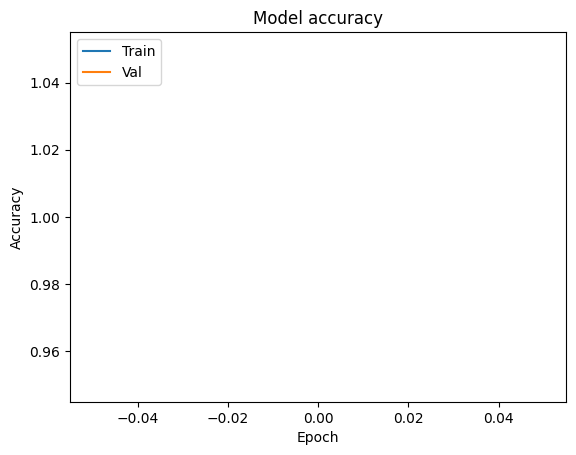

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

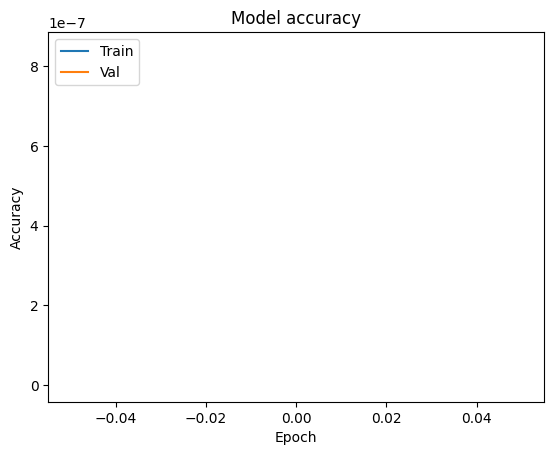

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

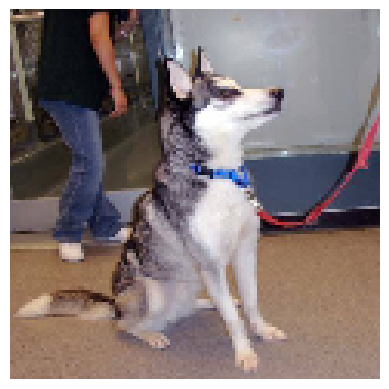

In [35]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image


img_path = '/content/test_set/test_set/dogs/dog.4001.jpg'
img = load_img(img_path, target_size=(120, 120))

# Convert the image to a NumPy array
img_array = img_to_array(img)

# Optionally, you can normalize the pixel data
img_array /= 255.0  # Scale pixel values to range [0, 1]

# Display the image (optional)
import matplotlib.pyplot as plt
plt.imshow(img_array)
plt.axis('off')  # Hide axes
plt.show()

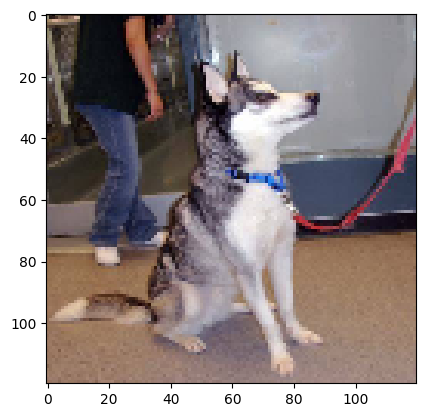

In [36]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.preprocessing import image
import keras.utils as image
import numpy as np

img_pred=image.load_img('/content/test_set/test_set/dogs/dog.4001.jpg',target_size=(224,224))

# convert to array
img = img_to_array(img)

# center pixel data
img = img / 255.0

# show the image
plt.imshow(np.uint8(img*255))
plt.show()


In [41]:
import numpy as np
img_pred=image.load_img("/content/test_set/test_set/dogs/dog.4001.jpg",target_size=(224,224))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt >= 1.5:
    prediction="cat"


else:
    prediction="dog"
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 555ms/step
[[1.]]
dog


In [42]:
# Save the entire model to a file
model.save('my_modelcatndog.h5')

In [43]:
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('my_modelcatndog.h5')